In [1]:
import numpy as np 
import qutip as qt
from qutip import rand_ket_haar, w_state, ghz_state
from itertools import permutations, product
import experiments_dfe as experiments 
import matplotlib.pyplot as plt
import time 

In [4]:
eps = 0.05
delta = 0.05
beta = 0.0
qubits = 2
p = 0.1
d = 2 ** qubits
state = 'haar_state'
iters = 1000

## DFE ORIGINAL

In [ ]:
differences = []
machine = experiments.DFE(eps, delta, beta, qubits, p, state)
total_copies_m = []

init_time = time.time()
for it in range(iters):
    print("--------------  k = {} --------------".format(it))
    Y, F, m = machine.measure_pauli_wk(grouping = False, method = "si", condition = "qwc")
    print("Noisy fidelity = {}, True fidelity = {}, Total copies = {}".format(Y, F, m))
    differences.append(Y - F)
    total_copies_m.append(m)
print("time = {} s.".format(time.time() - init_time))

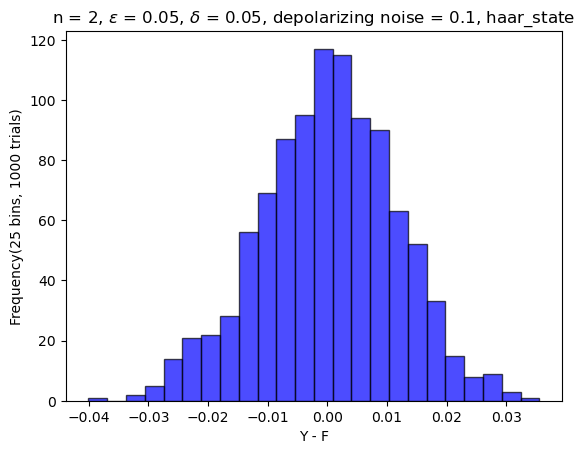

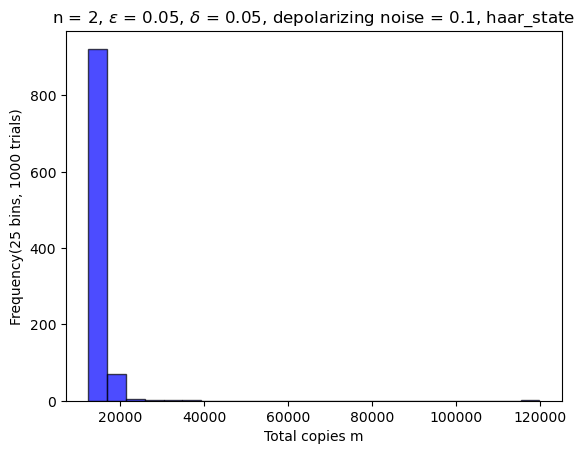

In [9]:
plt.hist(np.array([x.real for x in differences]), bins=24, edgecolor='k', alpha=0.7, color = 'blue')
plt.style.use('default')
plt.title(r'n = {}, $\varepsilon$ = {}, $\delta$ = {}, depolarizing noise = {}, {}'.format(qubits, eps, delta, p, state))
plt.xlabel('Y - F')
plt.ylabel('Frequency(25 bins, {} trials)'.format(iters))
plt.grid(False)
plt.show()

plt.style.use('default')
plt.hist(np.array([x.real for x in total_copies_m]), bins=24, edgecolor='k', alpha=0.7, color = 'blue')
plt.title(r'n = {}, $\varepsilon$ = {}, $\delta$ = {}, depolarizing noise = {}, {}'.format(qubits, eps, delta, p, state))
plt.xlabel('Total copies m')
plt.ylabel('Frequency(25 bins, {} trials)'.format(iters))
plt.grid(False)
plt.show()


## DFE Fully-commuting (FC) - Non-overlapping

In [ ]:
machine = experiments.DFE(eps, delta, beta, qubits, p, state)
differences_group_no_fc = []
total_copies_m_group_no_fc = []

init_time = time.time()
for it in range(iters):
    print("--------------  k = {} --------------".format(it))
    Y, F, m, len_groups = machine.measure_pauli_wk(grouping = True, method = "si", condition = "fc")
    print("Noisy fidelity = {}, True fidelity = {}, Total copies = {}".format(Y, F, m))
    differences_group_no_fc.append(Y - F)
    total_copies_m_group_no_fc.append(m)
print("time = {} s.".format(time.time() - init_time))

## DFE Qubit-wise commuting (QWC) - Non-overlapping

In [ ]:
machine = experiments.DFE(eps, delta, beta, qubits, p, state)
differences_group_no_qw = []
total_copies_m_group_no_qw = []
init_time = time.time()

for it in range(iters):
    print("--------------  k = {} --------------".format(it))
    Y, F, m, len_groups = machine.measure_pauli_wk(grouping = True, method = "si", condition = "qwc")
    print("Noisy fidelity = {}, True fidelity = {}, Total copies = {}".format(Y, F, m))
    differences_group_no_qw.append(Y - F)
    total_copies_m_group_no_qw.append(m)
print("time = {} s.".format(time.time() - init_time))

## Plots

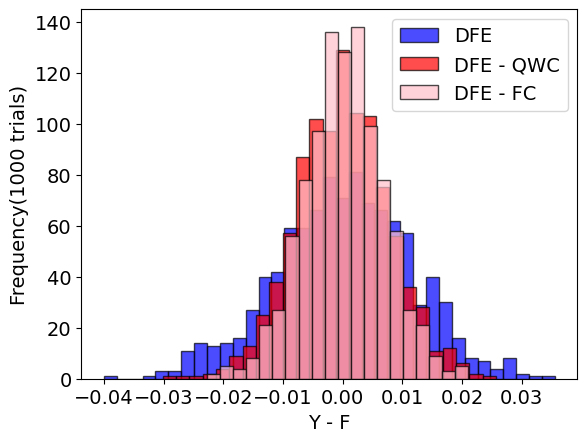

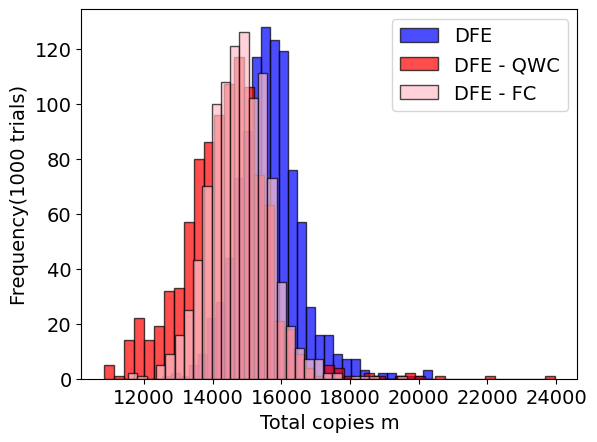

In [ ]:
plt.hist(np.array(sorted([x.real for x in differences][0:1000]))[0:1000], bins=35, edgecolor='k', alpha=0.7, color = "blue", label = "DFE")
plt.hist(np.array([x.real for x in differences_group_no_qw])[0:1000], bins=25, edgecolor='k', alpha=0.7, color = "red", label = "DFE - QWC")
plt.hist(np.array([x.real for x in differences_group_no_fc])[0:1000], bins=20, edgecolor='k', alpha=0.7, color = "pink", label = "DFE - FC")
plt.xlabel('Y - F', fontsize = 14)
plt.style.use('default')
plt.ylabel('Frequency({} trials)'.format(iters), fontsize = 14)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(False)
plt.show()

plt.hist(np.array(sorted([x.real for x in total_copies_m][0:1000]))[0:990], bins=30, edgecolor='k', alpha=0.7, color = "blue", label = "DFE")
plt.hist(np.array(sorted([x.real for x in total_copies_m_group_no_qw][0:1000]))[0:999], bins=45, edgecolor='k', alpha=0.7, color = "red", label = "DFE - QWC")
plt.hist(np.array(sorted([x.real for x in total_copies_m_group_no_fc][0:1000]))[0:999], bins=30, edgecolor='k', alpha=0.7, color = "pink", label = "DFE - FC")
plt.xlabel('Total copies m', fontsize = 14)
plt.style.use('default')
plt.ylabel('Frequency({} trials)'.format(iters), fontsize = 14)
plt.grid(False)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


